In [2]:
!unzip /content/drive/MyDrive/Dataset/IMDB_SENTIMENT.zip

Archive:  /content/drive/MyDrive/Dataset/IMDB_SENTIMENT.zip
  inflating: IMDB Dataset.csv        


In [3]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
import random
from string import punctuation
import pandas as pd

In [4]:
df = pd.read_csv("IMDB Dataset.csv")
df.shape

(50000, 2)

In [5]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
t=str.maketrans("","",punctuation)
s="salam@"
s.translate(t)

'salam'

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop_words=stopwords.words('english')

In [11]:
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
positive = []
negative = []

for index, row in df.iterrows():
    if row['sentiment'] == 'positive':
        positive.append(row)
    elif row['sentiment'] == 'negative':
        negative.append(row)

In [14]:
len(positive)

25000

In [15]:
positive[0][0]

/tmp/ipython-input-384779547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive[0][0]


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [16]:
negative_document=[]
max_len_neg=0
for ne in negative:
    ne=ne[0]
    tokens = word_tokenize(ne)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_neg:
      max_len_neg=len(tokens)

    negative_document.append(" ".join(tokens))

print(len(negative_document))

/tmp/ipython-input-1684628552.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ne=ne[0]


25000


In [17]:
positive_document=[]
max_len_pos=0
for pos in positive:
    pos=pos[0]
    tokens = word_tokenize(pos)
    t=str.maketrans("","",punctuation)
    tokens= [ w.translate(t) for w in tokens  ]
    tokens= [ w for w in tokens if w not in stop_words ]
    if len(tokens) > max_len_pos:
      max_len_pos=len(tokens)

    positive_document.append(" ".join(tokens))

print(len(positive_document))

/tmp/ipython-input-3988056002.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos=pos[0]


25000


In [18]:
positive_document[0]

'One reviewers mentioned watching 1 Oz episode hooked  They right  exactly happened  br    br   The first thing struck Oz brutality unflinching scenes violence  set right word GO  Trust  show faint hearted timid  This show pulls punches regards drugs  sex violence  Its hardcore  classic use word  br    br   It called OZ nickname given Oswald Maximum Security State Penitentary  It focuses mainly Emerald City  experimental section prison cells glass fronts face inwards  privacy high agenda  Em City home many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish  scuffles  death stares  dodgy dealings shady agreements never far away  br    br   I would say main appeal show due fact goes shows would nt dare  Forget pretty pictures painted mainstream audiences  forget charm  forget romance  OZ nt mess around  The first episode I ever saw struck nasty surreal  I could nt say I ready  I watched  I developed taste Oz  got accustomed high levels graphic violence  Not violence  injust

In [19]:
max_len=max(max_len_neg,max_len_pos)

In [20]:
random.shuffle(positive_document)
random.shuffle(negative_document)

In [21]:
train_data=negative_document[:20000]+positive_document[:20000]
len(train_data)

40000

In [22]:
train_y = [0 for i in range(20000)]+[1 for i in range(20000)]

In [23]:
len(train_y)

40000

In [24]:
test_data=negative_document[20000:]+positive_document[20000:]
len(test_data)

10000

In [25]:
test_y = [0 for i in range(5000)]+[1 for i in range(5000)]

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dropout,MaxPool1D,Dense,Embedding,Flatten,concatenate,Conv1D

In [27]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data)

In [28]:
import pickle
with open("tokenizer.h5",mode="wb") as f:
  pickle.dump(tokenizer,f)

In [29]:
encode = tokenizer.texts_to_sequences(train_data)

In [30]:
encode[0]

[7,
 63401,
 3397,
 10,
 7,
 614,
 40,
 18620,
 19935,
 17494,
 21463,
 31383,
 3229,
 4576,
 49547,
 1,
 1,
 1779,
 1347,
 234,
 434,
 8731,
 3,
 354,
 866,
 6283,
 645,
 925,
 213,
 2542,
 3,
 420,
 398,
 266,
 420,
 398,
 125,
 4603,
 28,
 7,
 438,
 1602,
 1928,
 101,
 6015,
 326,
 423,
 15,
 2,
 6,
 46,
 1118,
 18621,
 8732,
 2687,
 21464,
 1184,
 97,
 19936,
 1668,
 88,
 823,
 222,
 334,
 2679,
 433,
 26,
 3302,
 208,
 57,
 103,
 96,
 246,
 773,
 178,
 182,
 1294,
 38,
 12,
 1978,
 661,
 1,
 1,
 358,
 571,
 2,
 1570]

In [31]:
padded = pad_sequences(encode,max_len,padding="post")

In [32]:
padded.shape

(40000, 1824)

In [33]:
vocab_len = len(tokenizer.word_index)+1

In [34]:
input1 = Input(shape=(max_len,))
embeding1 = Embedding(vocab_len,100)(input1)
conv1 = Conv1D(filters=32,kernel_size=3,activation='relu')(embeding1)
drop1= Dropout(0.3)(conv1)
pool1=MaxPool1D(pool_size=2)(drop1)
flat1=Flatten()(pool1)
dense1=Dense(10,activation='relu')(flat1)
output=Dense(1,activation='sigmoid')(dense1)

In [35]:
model = Model(inputs=[input1],outputs=output)

In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1824)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 1824, 100)      │    12,335,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1822, 32)       │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1822, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 911, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       291,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,636,373 (48.20 MB)

 Trainable params: 12,636,373 (48.20 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.utils import plot_model

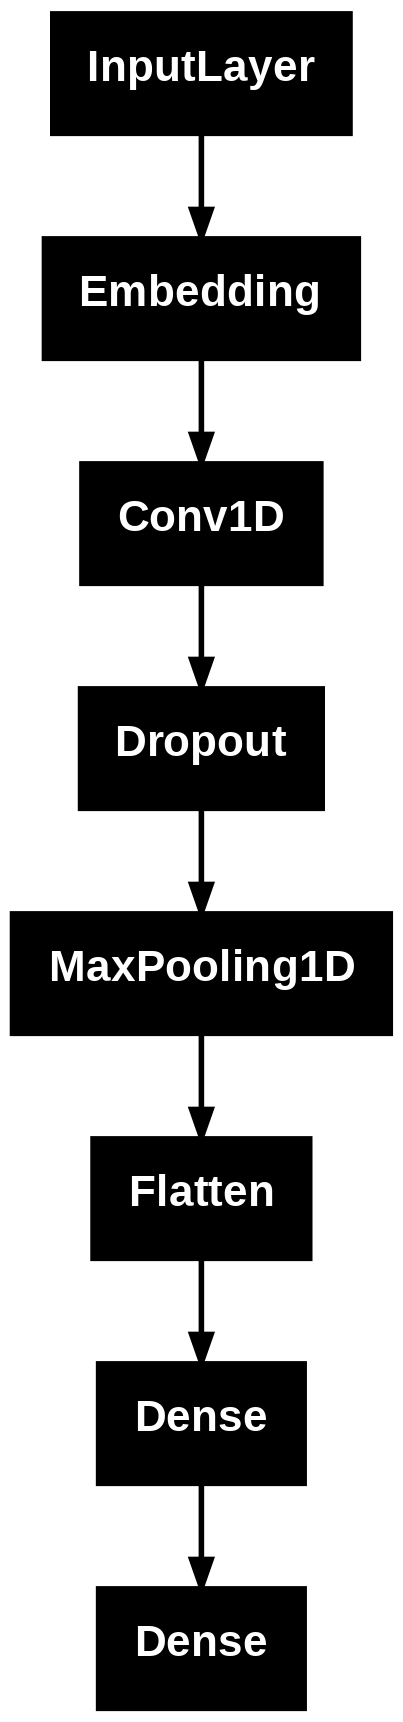

In [39]:
plot_model(model)

In [40]:
encode_test = tokenizer.texts_to_sequences(test_data)
padded_test = pad_sequences(encode_test,max_len,padding="post")

In [41]:
import numpy as np

In [42]:
history = model.fit([padded],np.array(train_y),epochs=10,batch_size=50,validation_data=([padded_test],np.array(test_y)))

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7229 - loss: 0.4725 - val_accuracy: 0.9005 - val_loss: 0.2447
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9597 - loss: 0.1128 - val_accuracy: 0.8993 - val_loss: 0.2658
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9902 - loss: 0.0332 - val_accuracy: 0.8963 - val_loss: 0.3413
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9968 - loss: 0.0115 - val_accuracy: 0.8891 - val_loss: 0.4488
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.8900 - val_loss: 0.5766
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.8891 - val_loss: 0.5710
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.8864 - val_loss: 0.5973
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9978 - loss: 0.0070 - 

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

test_predictions = (model.predict(padded_test) > 0.5).astype(int).flatten()
precision = precision_score(test_y, test_predictions)
recall = recall_score(test_y, test_predictions)
f1 = f1_score(test_y, test_predictions)
conf_matrix = confusion_matrix(test_y, test_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.8733
Recall: 0.9114
F1-Score: 0.8920


In [44]:
conf_matrix

array([[4339,  661],
       [ 443, 4557]])

In [45]:
print(classification_report(test_y, test_predictions, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.87      0.89      5000
    Positive       0.87      0.91      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



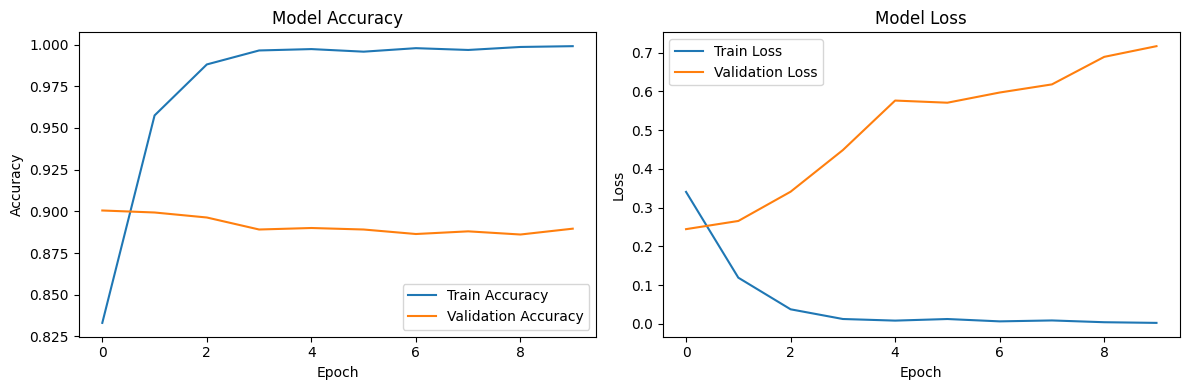

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()